In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'font.size': 14})

import warnings
warnings.filterwarnings("ignore")

c:\Users\vinic\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Conhecendo os dados

In [2]:
# Definindo o número máximo de colunas para None (todas as colunas serão exibidas)
pd.set_option('display.max_columns', None)

# Realizando a importação dos dados
df = pd.read_excel(r"C:\Users\vinic\OneDrive\Vinicius\A3Data\churn-telecom\data\Customer-Churn.xlsx")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No
1,8984-HPEMB,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.65,8477.60,No
2,5989-AXPUC,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,118.60,7990.05,No
3,5734-EJKXG,Female,0,No,No,61,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,118.60,7365.70,No
4,8199-ZLLSA,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),118.35,7804.15,Yes


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Iterando sobre as colunas do DataFrame para verificar os valores
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Valores únicos da coluna {column}: {unique_values}")

Valores únicos da coluna customerID: ['7569-NMZYQ' '8984-HPEMB' '5989-AXPUC' ... '0827-ITJPH' '9764-REAFF'
 '6823-SIDFQ']
Valores únicos da coluna gender: ['Female' 'Male']
Valores únicos da coluna SeniorCitizen: [0 1]
Valores únicos da coluna Partner: ['Yes' 'No']
Valores únicos da coluna Dependents: ['Yes' 'No']
Valores únicos da coluna tenure: [72 71 68 61 67 48 60 70 55 66 34 69 56 45 54 62 64 43 41 50 59 47 35 57
 16 12 53 51 44 11 52 21 65 28 38 58 27 33 30 46 63 40 10  6 32 49 25 42
 20  3 13 37 17 19 39 23 36 14 26  4  8 15  5 24 22  2 31 29 18  9  1  7
  0]
Valores únicos da coluna PhoneService: ['Yes' 'No']
Valores únicos da coluna MultipleLines: ['Yes' 'No' 'No phone service']
Valores únicos da coluna InternetService: ['Fiber optic' 'DSL' 'No']
Valores únicos da coluna OnlineSecurity: ['Yes' 'No' 'No internet service']
Valores únicos da coluna OnlineBackup: ['Yes' 'No' 'No internet service']
Valores únicos da coluna DeviceProtection: ['Yes' 'No' 'No internet service']
Valore

*Features do dataframe*

**customerID**: Identificação única atribuída ao cliente. Ex.:1234-ABCDE

**gender**: Sexo do cliente, Masculino ou Feminino.

**SeniorCitizen**: Indica se o cliente é idoso. Binário (0, 1)

**Partner**: Indica se o cliente possui um parceiro. Binário (não, sim)

**Dependents**: Indica se o cliente tem dependentes. Binário (não, sim)

**tenue**: Período de tempo que o cliente é da empresa. (Provavelmente em número de meses)

**PhoneService**: Indica se o cliente possui serviços de telefonia. Binário (não, sim)

**MultipleLines**: Indica se o cliente possui várias linhas. Ex.: não, sim, não possui serviço tefônico

**InternetService**: Tipo de serviço de Internet do cliente. Ex.: Fibra óptica, DSL, não possui

**OnlineSecurity**: Indica se o cliente possui o serviço de segurança online fornecido. Ex.: não, sim, não tem internet

**OnlineBackup**: Indica se o cliente possui o serviço de backup. Ex.: não, sim, não tem internet

**DeviceProtection**: Indica se o cliente possui o serviço de proteção de dispositivo. Ex.: não, sim, não tem internet

**TechSupport**: Indica se o cliente possui o serviço de suporte técnico. Ex.: não, sim, não tem internet

**StreamingTV**: Indica se o cliente possui algum serviço de TV por streaming. Ex.: não, sim, não tem internet

**StreamingMovies**: Indica se o cliente possui algum serviço de filmes por streaming. Ex.: não, sim, não tem internet

**Contract**: Indica o tipo de contrato que o cliente possui. Ex.: 1, 2 anos, mês a mês

**PaperlessBilling**: Indica se o cliente recebe a conta por correspondência. Binário (não, sim)

**PaymentMethod**: Indica o método de pagamento do cliente. Ex.: cartão de crédito, transferência bancária

**MonthlyCharges**: Valor mensal pago pelo cliente. Ex.: 110.50

**TotalCharges**: Valor total já cobrado do cliente. Ex.: 5560.85

**Churn**: Indica se o _customerID_ ainda é cliente. Binário (não, sim)

# Limpeza e tratamento dos dados

In [6]:
# Total de atributos no DataFrame
print(f"Features: {df.shape[1]} \n")

# Total de valores faltantes
print(f"Valores faltantes: {df.isnull().values.sum()}")

Features: 21 

Valores faltantes: 11


In [7]:
# Filtrando os registros que não possuem valores em "TotalCharges"
df[df['TotalCharges'].isnull()][['customerID','tenure','TotalCharges']]

,customerID,tenure,TotalCharges
2531,5709-LVOEQ,0,NaN
3343,4075-WKNIU,0,NaN
4023,2775-SEFEE,0,NaN
4315,1371-DWPAZ,0,NaN
4583,4472-LVYGI,0,NaN
5484,4367-NUYAO,0,NaN
5549,3213-VVOLG,0,NaN
6213,3115-CZMZD,0,NaN
6429,2520-SGTTA,0,NaN
6562,7644-OMVMY,0,NaN


In [8]:
# Preenchendo os registros da coluna "TotalCharges" com 0. Haja visto que os que não possuem valores na determinada coluna, são clientes recentes.
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# EDA - Análise Exploratória de Dados

## Funções viz

In [9]:
def bar_pie_viz(df, feature, labels, figsize):
    # Contagem de valores em feature
    counts = df[feature].value_counts()

    # Porcentagem do total para cada
    percentages = counts / counts.sum() * 100

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    colors = ['#1f77b4', '#ff7f0e', '#0efff8', '#ff0e8e']

    if labels:
        labels = labels
    else:
        labels = counts.index
    
    # Plot barras
    ax1.bar(labels, counts.values, color=colors)
    ax1.set_xlabel(feature)
    ax1.set_ylabel('Quantidade')

    # Plot pizza
    ax2.pie(percentages, labels=labels, autopct='%1.1f%%', colors=colors)
    ax2.set_aspect('equal')

    plt.tight_layout()
    plt.show()

In [10]:
def violin_viz_mpl(df, feature, figsize, x_label, title):
    data_0 = df[df['Churn'] == 'No'][feature].values
    data_1 = df[df['Churn'] == 'Yes'][feature].values

    # Gráfico de violino por matplotlib
    plt.figure(figsize=figsize)
    plt.violinplot([data_0, data_1], showmedians=True, widths=0.7, positions=[1, 2], vert=False)

    plt.xlabel(x_label)
    plt.yticks([1, 2], ['Não churn', 'Churn'])
    plt.title(title)
    plt.show()

In [11]:
def violin_viz(df, feature, filters, labels, title, figsize):
    # Filtrando dados por feature
    data_3 = data_4 = pd.DataFrame()
    data_1 = df[df[feature] == filters[0]]
    data_2 = df[df[feature] == filters[1]]
    
    if len(filters) >= 3:
        data_3 = df[df[feature] == filters[2]]
        if len(filters) == 4:
            data_3 = df[df[feature] == filters[2]]
            data_4 = df[df[feature] == filters[3]]
    

    # Combinando os conjuntos de dados
    combined_data = pd.concat([data_2, data_1, data_3, data_4])
    if labels:
        combined_data[feature] = combined_data[feature].map(labels)

    # Plotando gráfico de violino combinado
    plt.figure(figsize=figsize)
    sns.violinplot(x=feature, y='MonthlyCharges', hue='Churn', split=True, data=combined_data, palette='Set2')
    plt.xlabel(feature)
    plt.ylabel('Cobranças Mensais $')
    plt.title(title)
    plt.legend(title='Churn', loc='upper right')
    plt.show()

In [12]:
def histogramas(df, feature, figsize=(5, 5)):
    plt.figure(figsize=figsize)
    sns.histplot(data = df, x = feature, hue = 'Churn', multiple = 'dodge')
    plt.title(f'Histograma: {feature} com Churn')
    plt.xlabel(feature)
    plt.ylabel('Frequência')

## Quantidade de Churn

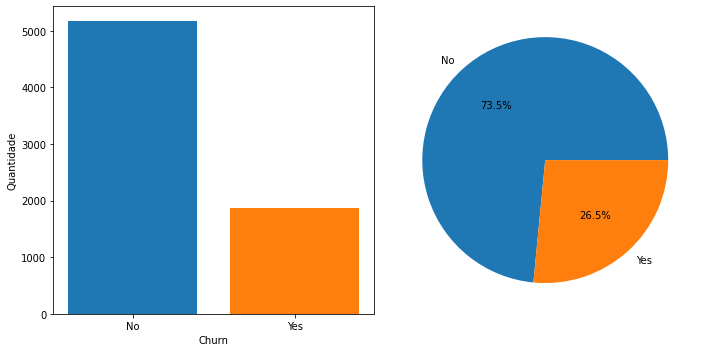

In [13]:
bar_pie_viz(df, 'Churn', ['No', 'Yes'], (10,5))

## Features Numéricas

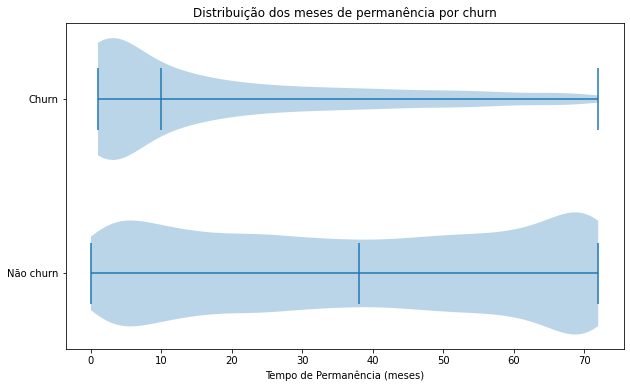

In [14]:
violin_viz_mpl(df, 'tenure', (10, 6), 'Tempo de Permanência (meses)', 'Distribuição dos meses de permanência por churn')

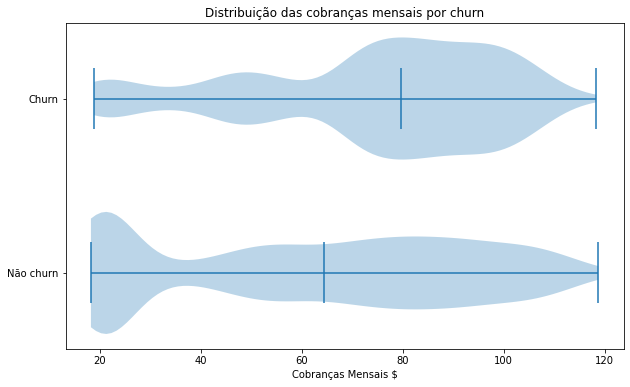

In [15]:
violin_viz_mpl(df, 'MonthlyCharges', (10, 6), 'Cobranças Mensais $', 'Distribuição das cobranças mensais por churn')

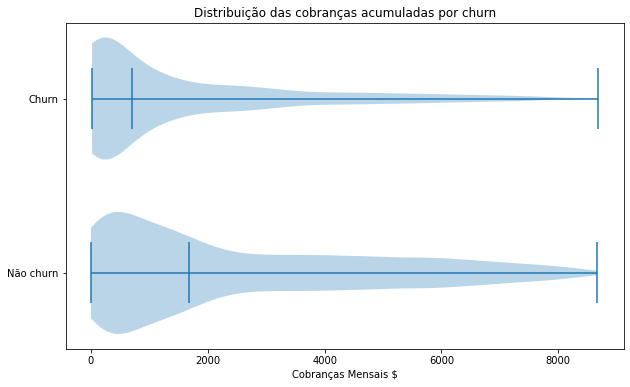

In [16]:
violin_viz_mpl(df, 'TotalCharges', (10, 6), 'Cobranças Mensais $', 'Distribuição das cobranças acumuladas por churn')

_Pontos relevantes_

* Churn de clientes é mais provável ocorrer dentro dos primeiros 20 meses.
* Clientes churn tendem a ter cobranças mensais acima de $60.
* A probabilidade de churn de um cliente aumenta com o aumento das cobranças mensais.

## Features Categóricas

### gender - Sexo do cliente, Masculino ou Feminino.

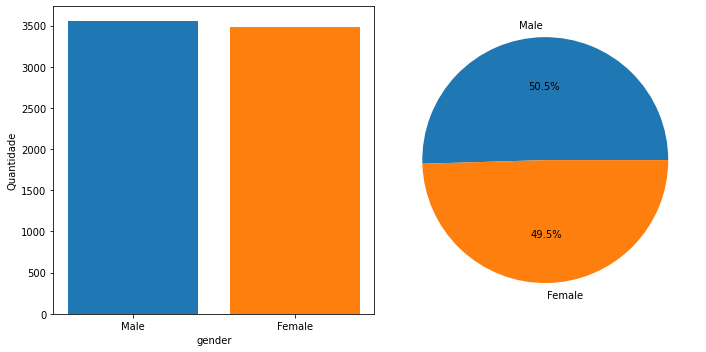

In [17]:
bar_pie_viz(df, 'gender', ['Male', 'Female'], (10,5))

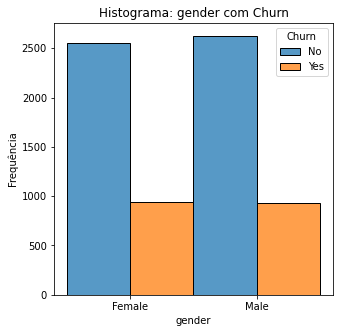

In [18]:
histogramas(df, 'gender')

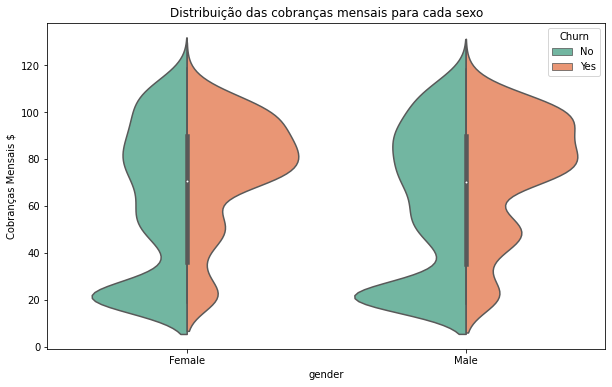

In [19]:
violin_viz(df, 'gender', ['Male', 'Female'], {}, 'Distribuição das cobranças mensais para cada sexo', (10, 6))

_Pontos relevantes_

* A distribuição de clientes por sexo é equilibrada.
* Observa-se um comportamento semelhante nos perfis de churn entre os sexos.

### SeniorCitizen - Indica se o cliente é ou não idoso

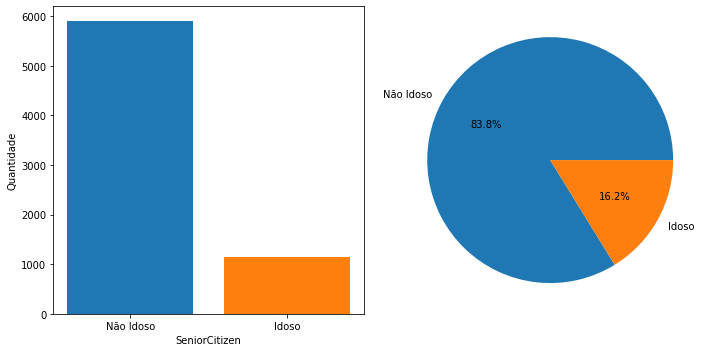

In [20]:
bar_pie_viz(df, 'SeniorCitizen', ['Não Idoso', 'Idoso'], (10,5))

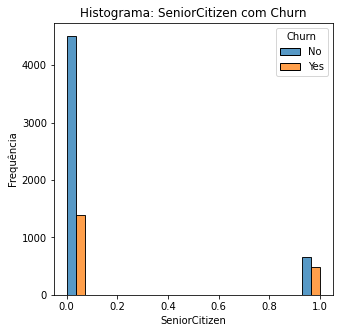

In [21]:
histogramas(df, 'SeniorCitizen')

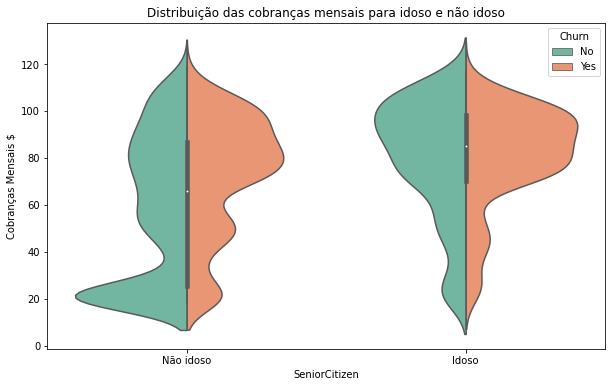

In [22]:
violin_viz(df, 'SeniorCitizen', [1, 0], {0:'Não idoso', 1:'Idoso'}, 'Distribuição das cobranças mensais para idoso e não idoso', (10, 6))

_Pontos relevantes_

* Uma proporção maior de idosos se torna churn do que os não idosos.
* Idosos e não idosos tornam-se churn quando as cobranças mensais sobem acima de $ 60.
* Os não idosos são mais propensos a ter cobranças mensais em torno de $ 20.
* Os não-idosos tem um pouco mais de probabilidade de churn com taxas mensais inferiores a $ 60 do que os idosos.

### Partner - Indica se o cliente possui ou não um parceiro.

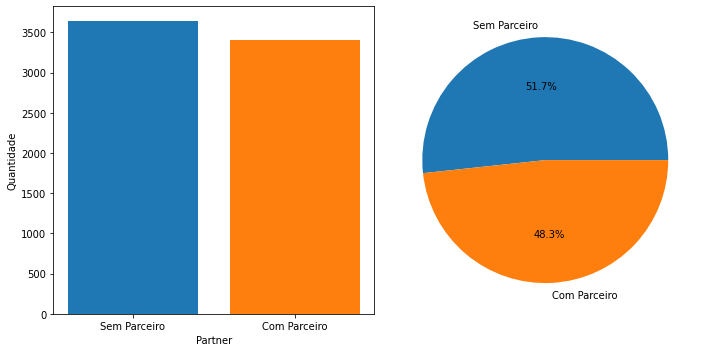

In [23]:
bar_pie_viz(df, 'Partner', ['Sem Parceiro', 'Com Parceiro'], (10,5))

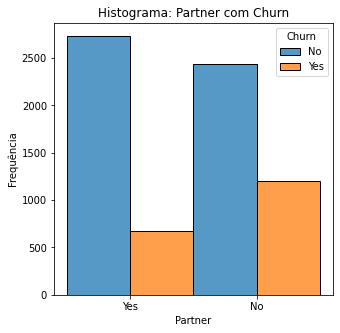

In [24]:
histogramas(df, 'Partner')

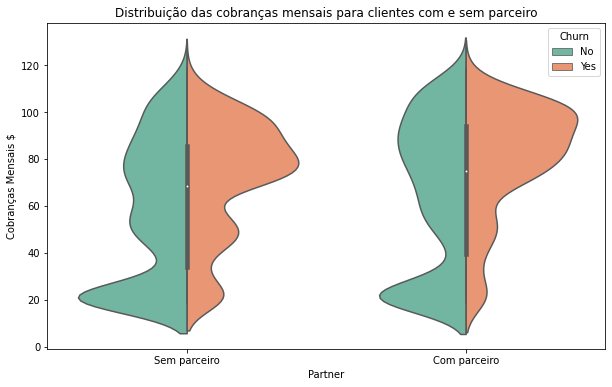

In [25]:
violin_viz(df, 'Partner', ['Yes','No'], {'Yes':'Com parceiro', 'No':'Sem parceiro'}, 'Distribuição das cobranças mensais para clientes com e sem parceiro', (10, 6))

_Pontos relevantes_

* O conjunto de dados é segmentado em partes semelhantes em clientes com e sem parceiros.
* Os clientes sem parceiros demonstram uma ligeira maior atividade de movimentação em comparação aos clientes com parceiros.

### Dependents - Indica se o cliente tem ou não dependentes.

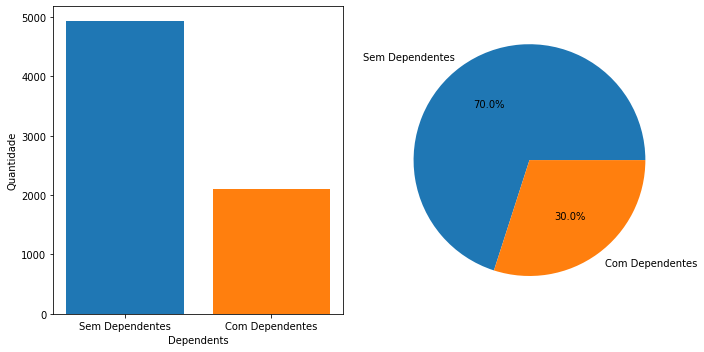

In [26]:
bar_pie_viz(df, 'Dependents', ['Sem Dependentes', 'Com Dependentes'], (10,5))

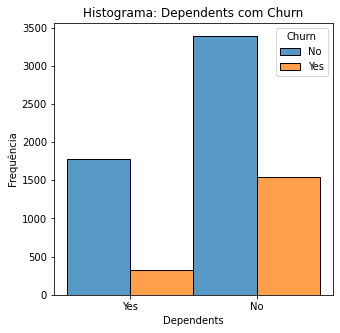

In [27]:
histogramas(df, 'Dependents')

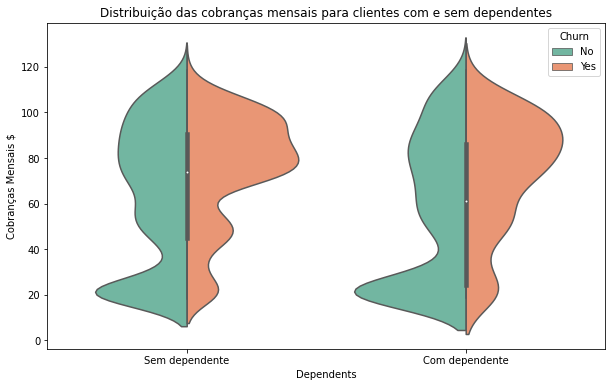

In [28]:
violin_viz(df, 'Dependents', ['Yes', 'No'], {'Yes':'Com dependente', 'No':'Sem dependente'}, 'Distribuição das cobranças mensais para clientes com e sem dependentes', (10, 6))

_Pontos relevantes_

* Clientes sem dependentes movimentam um pouco mais do que aqueles com dependentes.
* Os encargos mensais entre aqueles que clientes churn e não churn são bastante semelhantes para ambos os valores de parceiro e ambos os valores dependentes.

### PhoneService - Indica se o cliente possui serviços de telefonia.

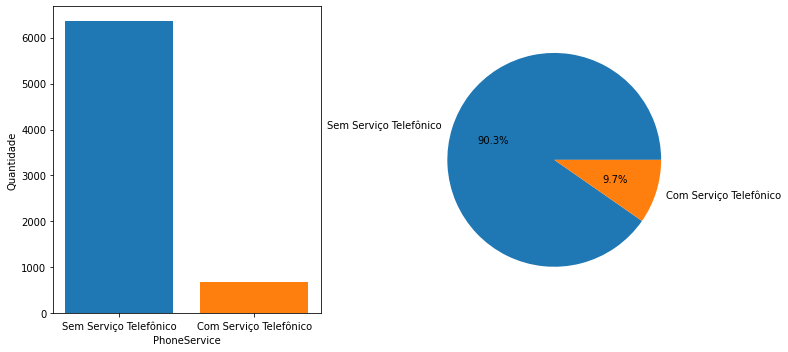

In [29]:
bar_pie_viz(df, 'PhoneService', ['Sem Serviço Telefônico', 'Com Serviço Telefônico'], (11,5))

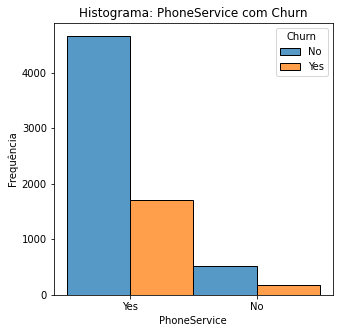

In [30]:
histogramas(df, 'PhoneService')

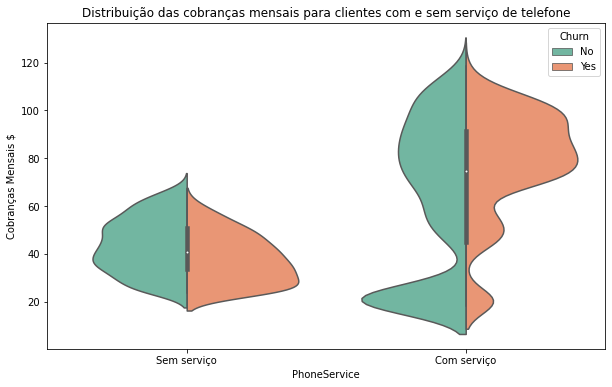

In [31]:
violin_viz(df, 'PhoneService', ['Yes', 'No'], {'Yes':'Com serviço', 'No':'Sem serviço'}, 'Distribuição das cobranças mensais para clientes com e sem serviço de telefone', (10, 6))

_Pontos relevantes_

* Majoritariamente os clientes não possuem serviço telefônico, cerca de 90% da base.

### MultipleLines - Indica se o cliente possui várias linhas.

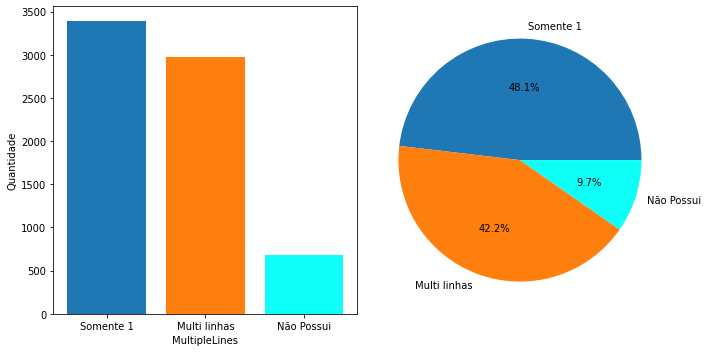

In [32]:
bar_pie_viz(df, 'MultipleLines', ['Somente 1', 'Multi linhas', 'Não Possui'], (10,5))

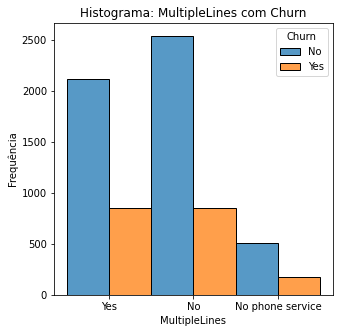

In [33]:
histogramas(df, 'MultipleLines')

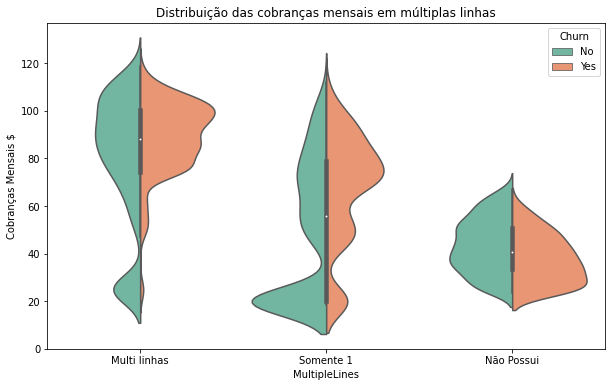

In [34]:
violin_viz(df, 'MultipleLines', ['No', 'Yes', 'No phone service'], {'Yes':'Multi linhas', 'No':'Somente 1', 'No phone service':'Não Possui'}, 'Distribuição das cobranças mensais em múltiplas linhas', (10, 6))

_Pontos relevantes_

* Clientes com serviços telefônicos pagam uma mensalidade média mais alta.
* Nota-se que clientes que churn e possuem várias linhas tendem a ter mensalidades mais altas com maior frequência em comparação àqueles que não possuem uma linha.

### InternetService - Tipo de serviço de Internet do cliente.

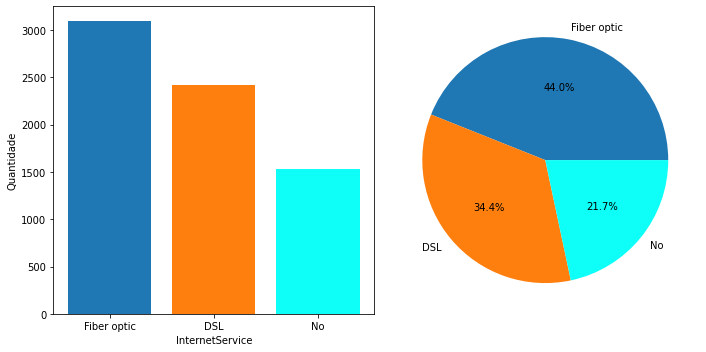

In [35]:
bar_pie_viz(df, 'InternetService', [], (10,5))

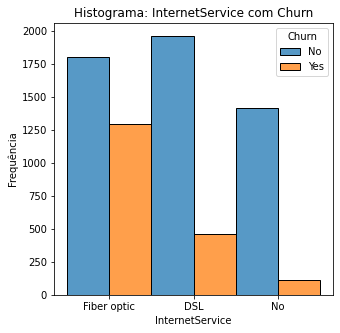

In [36]:
histogramas(df, 'InternetService')

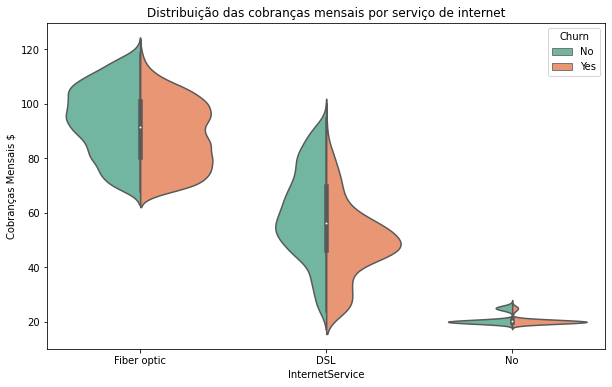

In [37]:
violin_viz(df, 'InternetService', ['DSL', 'Fiber optic', 'No'], {}, 'Distribuição das cobranças mensais por serviço de internet', (10, 6))

_Pontos relevantes_

* Fibra óptica é a opção de internet mais popular, com uma parcela de 44%.
* Os clientes que optam por fibra óptica têm uma rotatividade maior em comparação aos clientes DSL ou Sem Internet.
* A fibra óptica é um serviço significativamente mais caro.
* Os clientes com DSL são mais propensos a churn quando suas cobranças mensais estão entre $ 40 e $ 60.

### Contract - Indica o tipo de contrato que o cliente possui.

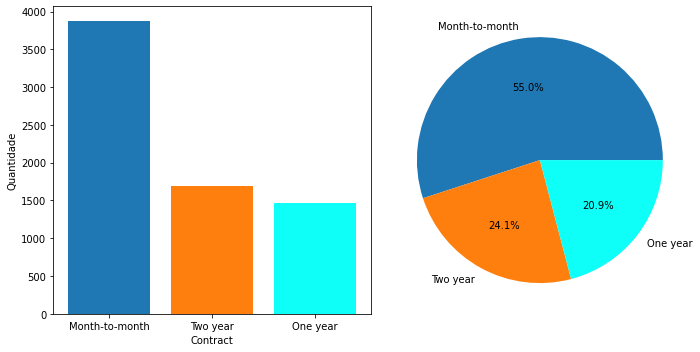

In [38]:
bar_pie_viz(df, 'Contract', [], (10,5))

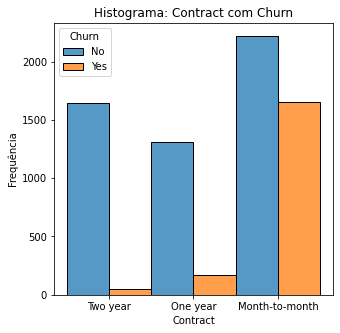

In [39]:
histogramas(df, 'Contract')

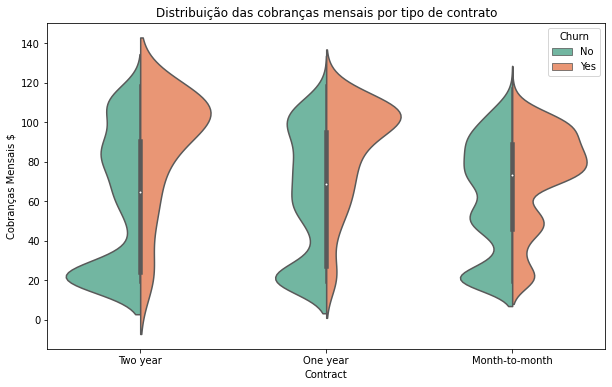

In [40]:
violin_viz(df, 'Contract', ['One year', 'Two year', 'Month-to-month'], {}, 'Distribuição das cobranças mensais por tipo de contrato', (10, 6))

_Pontos relevantes_

* Uma maioria expressiva de clientes opta pelo pagamento mensal como sua escolha de pagamento.
* É evidente a presença de um número maior de clientes churn entre os planos de pagamento mensal.
* Observa-se que, à medida que a duração do plano aumenta, a taxa de churn diminui proporcionalmente.
* Em contratos de longo prazo, uma parcela substancial dos clientes desfruta de custos mensais reduzidos.

### PaperlessBilling - Indica se o cliente recebe a conta por correspondência.

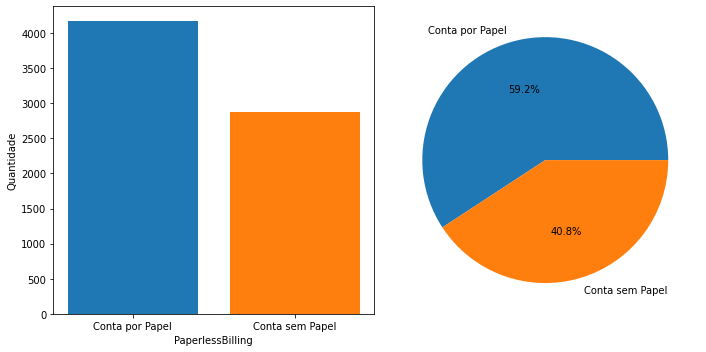

In [41]:
bar_pie_viz(df, 'PaperlessBilling', ['Conta por Papel', 'Conta sem Papel'], (10,5))

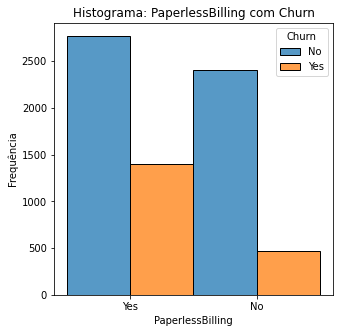

In [42]:
histogramas(df, 'PaperlessBilling')

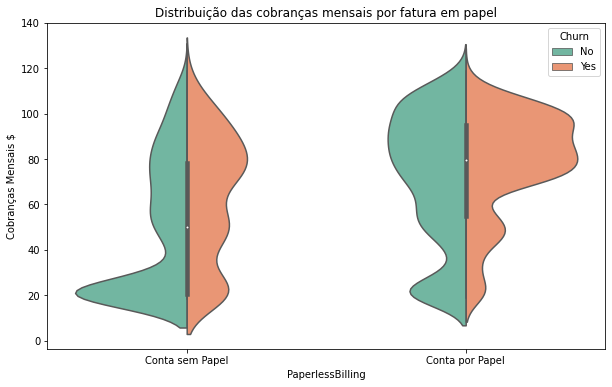

In [43]:
violin_viz(df, 'PaperlessBilling', ['Yes', 'No'], {'Yes':'Conta por Papel', 'No':'Conta sem Papel'}, 'Distribuição das cobranças mensais por fatura em papel', (10, 6))

_Pontos relevantes_

* Clientes que optam pelo serviço sem papel apresentam taxas de mudança semelhantes àqueles que não adotam essa opção quando o preço mensal é inferior a $60. No entanto, observa-se que acima desse valor, uma proporção maior de clientes sem papel faz a mudança em comparação com aqueles que não adotam a opção sem papel.

### PaymentMethod - Indica o método de pagamento do cliente.

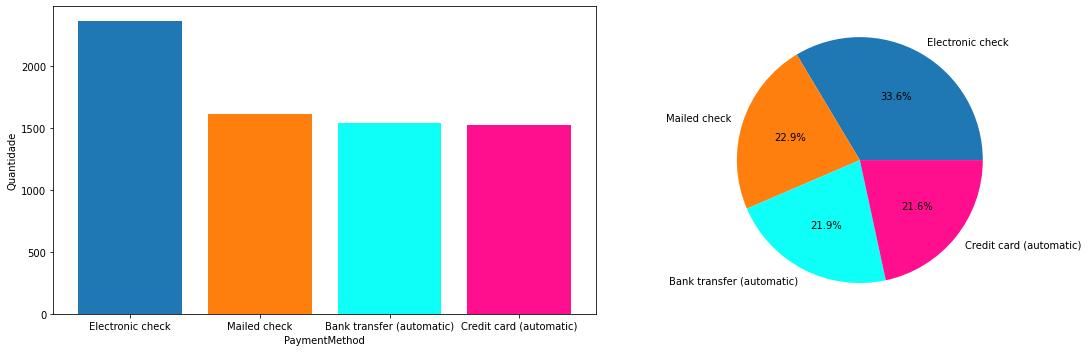

In [44]:
bar_pie_viz(df, 'PaymentMethod', [], (16,5))

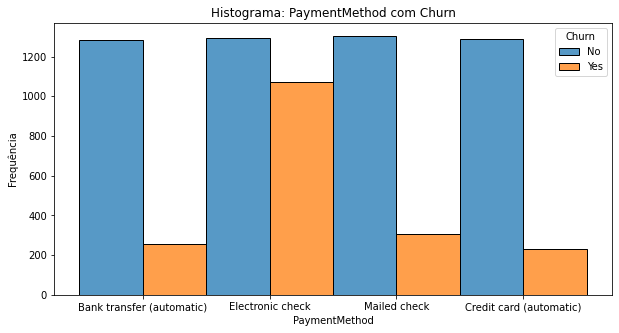

In [45]:
histogramas(df, 'PaymentMethod', figsize=(10,5))

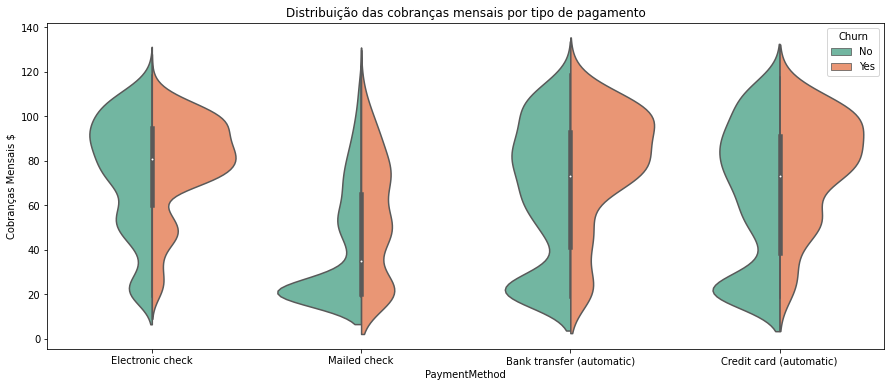

In [46]:
violin_viz(df, 'PaymentMethod', ['Mailed check', 'Electronic check', 'Bank transfer (automatic)', 'Credit card (automatic)'], {}, 'Distribuição das cobranças mensais por tipo de pagamento', (15, 6))

_Pontos relevantes_

* A distribuição entre os métodos de pagamento é relativamente equilibrada.
* Clientes que optam por pagamento com cartão de crédito mantêm taxas de churn consistentes, independentemente do valor da cobrança mensal, enquanto os clientes que utilizam transferência bancária, e-check ou cheque postal apresentam um aumento no churn quando as cobranças mensais ultrapassam $60.

# E se...

Oferecer Planos Flexíveis +
Incentivar a Adoção de Pagamentos Automatizados +
Reavaliar Preços para Serviços de Fibra Óptica +
Promoções Especiais para Clientes com DSL

In [47]:
df_client_conditions = df[(df['Contract'] == 'Month-to-month') & (df['PaymentMethod'] == 'Electronic check') & ((df['InternetService'] == 'Fiber optic') | (df['InternetService'] == 'DSL')) & (df['Churn'] == 'Yes')]
print(f"Total de clientes churn nas condições hipotéticas: {len(df_client_conditions)}")

Total de clientes churn nas condições hipotéticas: 981


In [48]:
df_client_churn = df[df['Churn'] == 'Yes']
print(f"Total de clientes churn da base de dados: {len(df_client_churn)}")

Total de clientes churn da base de dados: 1869


In [50]:
reduct_churn = round((((len(df_client_churn) - len(df_client_conditions)) / len(df_client_churn)) * 100), 1)

print(f"Redução hipotética no valor de: {reduct_churn}%")
print(f"Possibilitando uma queda de 27% para {int(27 - (((reduct_churn/100) * 0.27)*100))}% de churn")

Redução hipotética no valor de: 47.5%
Possibilitando uma queda de 27% para 14% de churn
